# Assignment-6

In [90]:

import numpy as np
import pywt
from pywt import wavedecn, waverecn
import matplotlib.pyplot as plt
import pandas as pd

# Q1  Generate a real chirp signal. Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components

## (a) Generate a real chirp signal

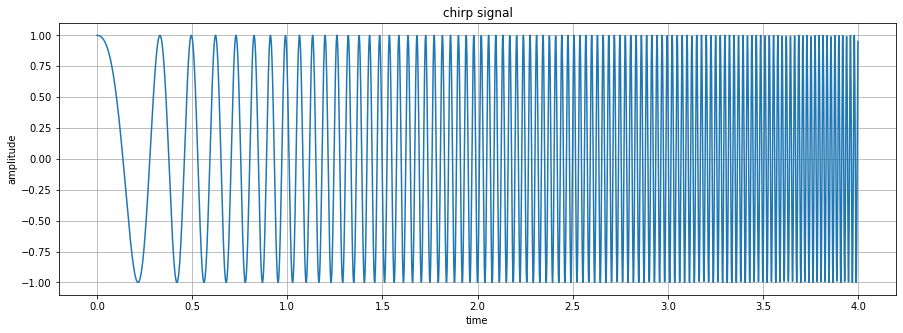

In [91]:
fs=1000 #sampling frequency
f0=1    #starting frequency
f1=fs/20   # end frequency
t1=4
t=np.arange(0,4,1/fs)
T=t1-t[0]    #duration of time 
k=(f1-f0)/T
x=np.cos(2*np.pi*(k/2*t+f0)*t)   #chirup signal
fig =plt.figure(figsize=(15,5))
plt.plot(t,x)
plt.title('chirp signal')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.grid()

## (b) Compute the subband decomposition of thisb signal upto three levels and plot the approximate and detail components.


In [92]:
# subband decompostion
approximate_component = pywt.downcoef('a',x, 'db2', mode='sym', level=3)   #approximate coefficent
detail_component= pywt.downcoef('d',x, 'db2', mode='sym', level=3)   #detail coefficent

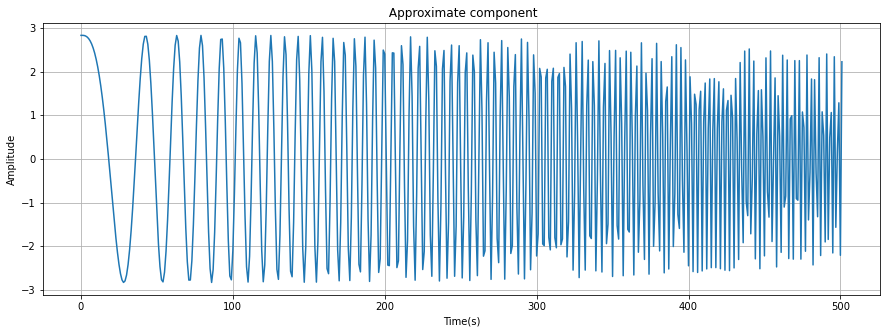

In [93]:
#plotting Approximate component
fig =plt.figure(figsize=(15,5))
plt.plot(approximate_component)
plt.title(" Approximate component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

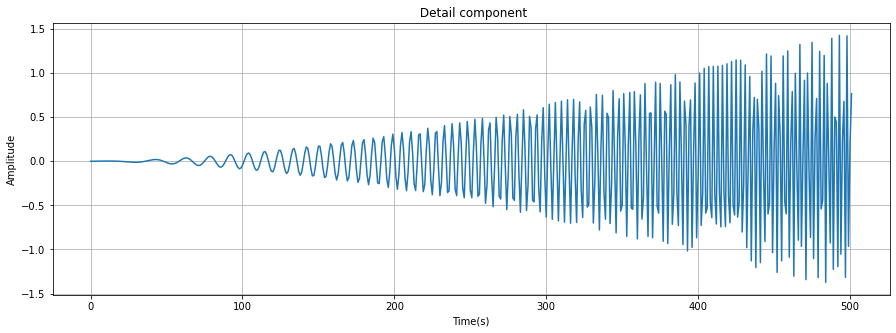

In [94]:
#plotting Detail component
fig =plt.figure(figsize=(15,5))
plt.plot(detail_component)
plt.title(" Detail component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()


# Q2 Consider the sample HeaviSine signal in PyWavelets library. The signal is          added with AWGN and a noisy signal is generated with SNR of 15 dB.

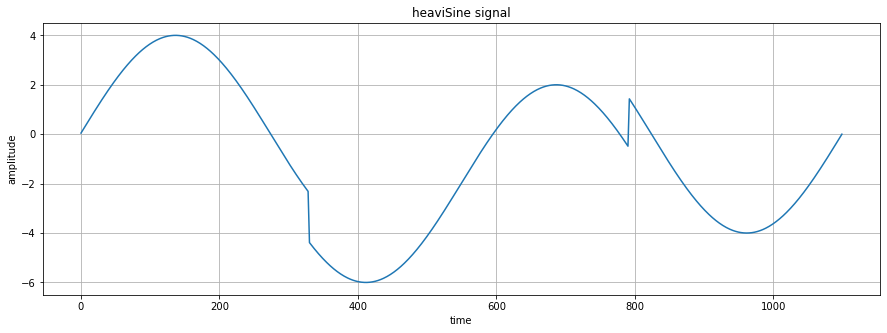

In [95]:
x = pywt.data.demo_signal('HeaviSine',1100)
fig =plt.figure(figsize=(15,5))
plt.plot(x)
plt.title('heaviSine signal')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.grid()

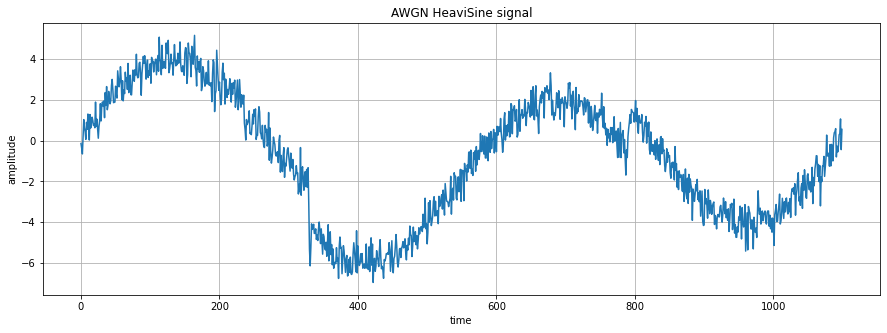

In [96]:
#adding 15 db SNR noise in HeaviSine signal
x_watts=x**2
x_avg_watts = np.mean(x_watts)
x_avg_db = 10 * np.log10(x_avg_watts)

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 15

noise_avg_db = x_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)

mean_noise = 0
noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))

y = x + noise
fig =plt.figure(figsize=(15,5))
plt.plot(y)
plt.title('AWGN HeaviSine signal')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.grid()

## (a) Perform Wavelet decomposition on this signal

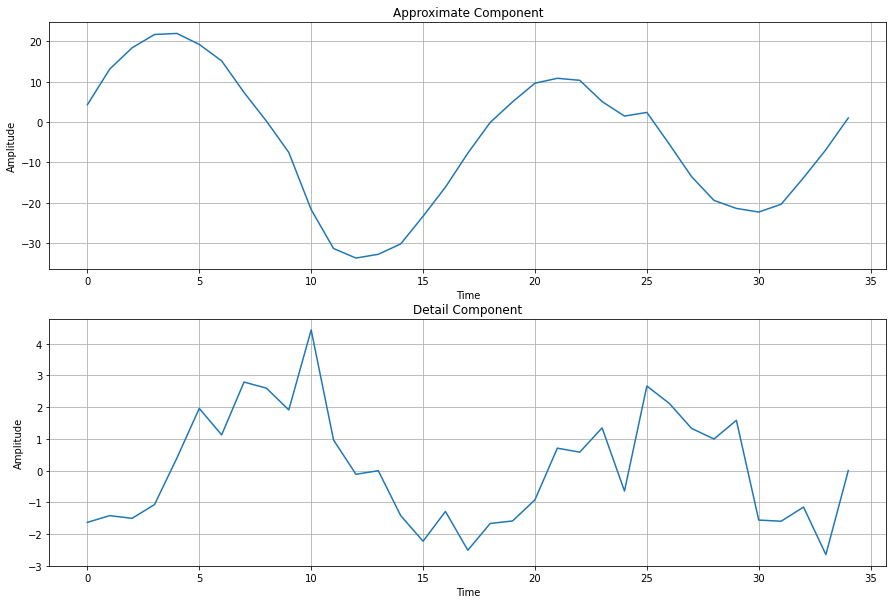

In [97]:
approximate_heavisine = pywt.downcoef('a',y, 'db1', mode='sym', level=5)
detail_heavisine = pywt.downcoef('d',y, 'db1', mode='sym', level=5)

components = [approximate_heavisine,detail_heavisine]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    plt.subplot(2,1,c)
    plt.plot(components[k])
    plt.title(str(name[k])+" Component")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1 
    

## (b) Use an appropriate thresholding method to denoise the signal.

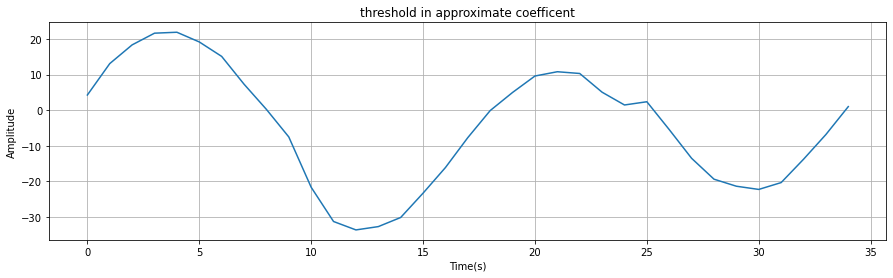

In [98]:
#thresholding on approximate component
sigma_Approx = (np.median(approximate_heavisine)/0.6745)

threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approximate_heavisine))))

approxi_thresold = pywt.threshold(approximate_heavisine,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
plt.plot(approxi_thresold)
plt.title("threshold in approximate coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()


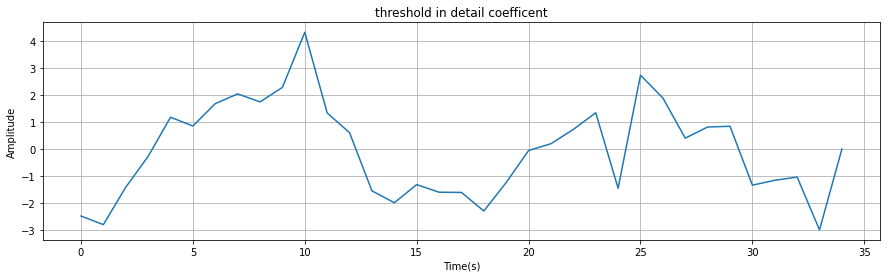

In [99]:
#thresholding on detail component
sigma_Detail = (np.median(detail_heavisine)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_heavisine))))
detail_thresold = pywt.threshold(detail_heavi,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
plt.plot(detail_thresold)
plt.title("threshold in detail coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

## (c) Reconstruct the signal and compare it with the original signal.


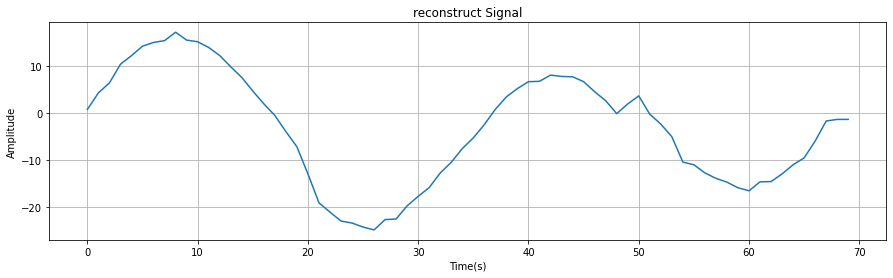

In [100]:
#Reconstructing signal
reconstruct_signal= pywt.idwt(approxi_thres,detail_thres, wavelet='db1', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
plt.plot(reconstruct_signal)
plt.title("reconstruct Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

# Q3.(a) Deconstruct the signal and smooth it out (remove high frequency noise) by using a suitable threshold.

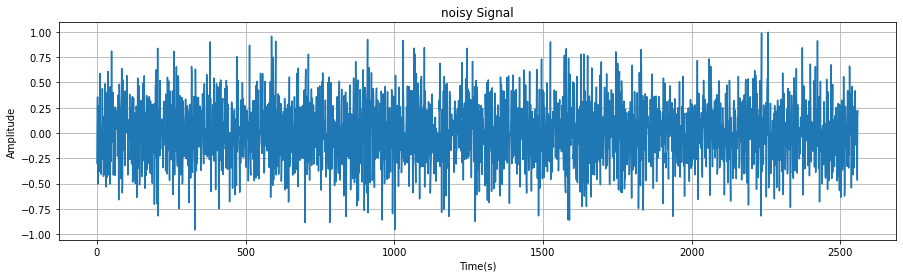

In [101]:
#load the dataset
dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\\acc_00015.csv",names=['0','1','2','3','4','5'])
data=dataset['5']
fig =plt.figure(figsize=(15,4))
plt.plot(data)
plt.title("noisy Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

In [102]:
approxi = pywt.downcoef('a',data, 'db1', mode='sym', level=5)
detail = pywt.downcoef('d',data, 'db1', mode='sym', level=5)

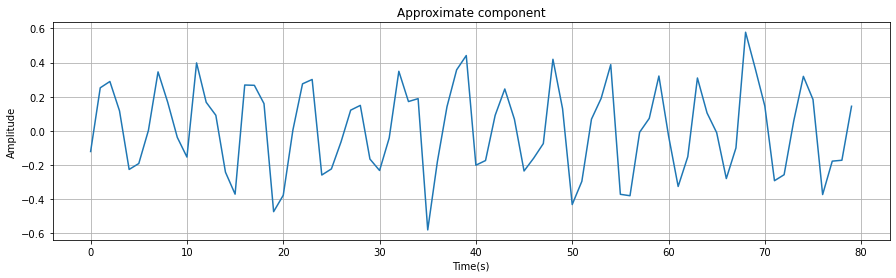

In [103]:
#approximate component plotting
fig =plt.figure(figsize=(15,4))
plt.plot(approxi)
plt.title("Approximate component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

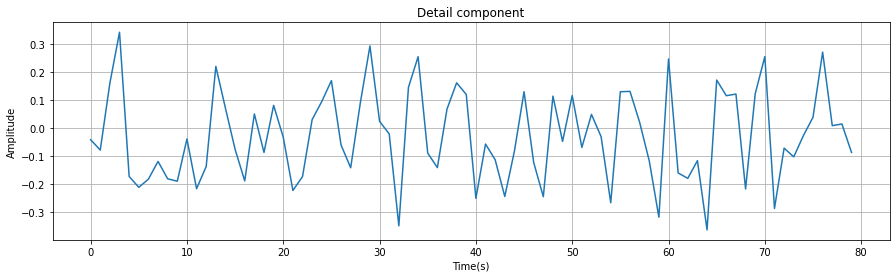

In [104]:
#Detail component plotting
fig =plt.figure(figsize=(15,4))
plt.plot(detail)
plt.title("Detail component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

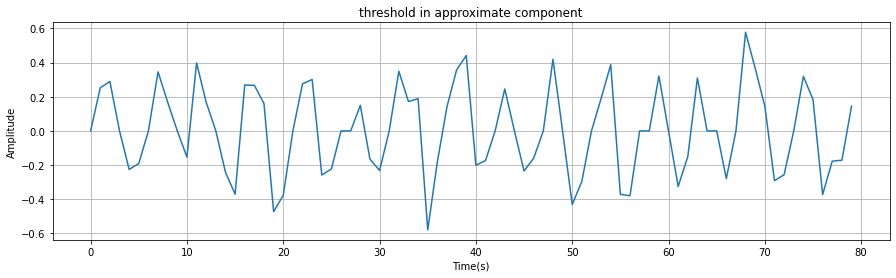

In [105]:
#thresolding on approximate component
sigma_Approx= (np.median(approxi)/0.6745)

threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approxi))))

approxi_thresold = pywt.threshold(approxi,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
plt.plot(approxi_thresold)
plt.title("threshold in approximate component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()              
           

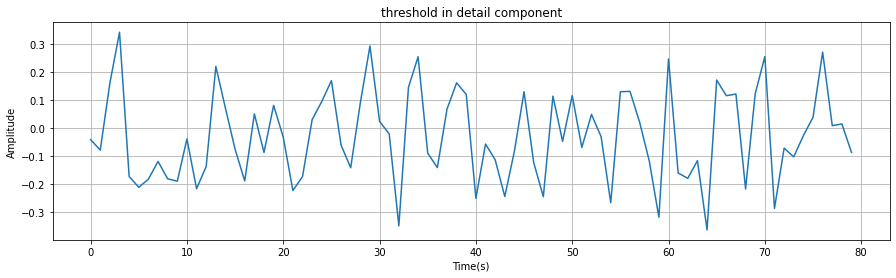

In [106]:
#thresolding on detail component
sigma_Detail = (np.median(detail)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail))))
detail_thresold = pywt.threshold(detail,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
plt.plot(detail_thresold)
plt.title("threshold in detail component")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()


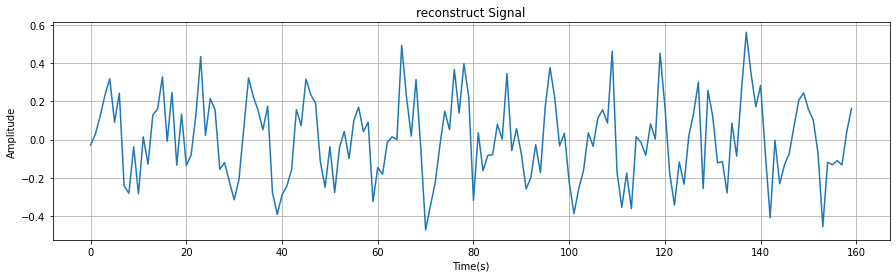

In [107]:
#reconstruct signal
reconstruct_signal= pywt.idwt(approxi_thresold,detail_thresold, wavelet='db1', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
plt.plot(reconstruct_signal)
plt.title("reconstruct Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()

## (b) Perform the same operation using Moving Average Filter 

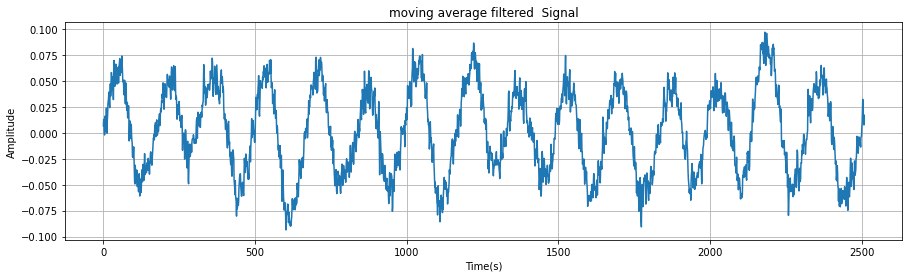

In [108]:
def MA(data,q):
    lst=[]
    for i in range(q,len(data)):
        temp=0
        for j in range(q):
            temp+=data[i-j-1]/q
        lst.append(temp)
    return np.array(lst)
filtered_data=MA(data,50)
fig =plt.figure(figsize=(15,4))
plt.plot(filtered_data)
plt.title("moving average filtered  Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
